## __Introduction : Credit Risk Analysis__

####  **Credit risk**
Credit Risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. If a company offers credit to its client,then there is a risk that its clients may not pay their invoices.                                

#### **Types of Credit Risk**        
 __Good Risk__: An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.               
 __Bad Risk__: A loan that is unlikely to be repaid because of bad credit history, insufficient income, or some other reason. A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.


####  **Objective**
Based on the attributes, classify a person as good or bad credit risk.
### Dataset Description
The dataset contains 1000 entries with 20 independent variables (7 numerical, 13 categorical) and 1 target variable prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.The attributes are:                                  
#### __Independent Variables__
   * Attribute 1:  (qualitative) __Status of existing checking account__                           
      A11 :      ... <    0 DM                           
      A12 : 0 <= ... <  200 DM                                   
      A13 :      ... >= 200 DM / salary assignments for at least 1 year                           
      A14 : no checking account    
      
   * Attribute 2:  (numerical) __Duration in month__

   * Attribute 3:  (qualitative) __Credit history__               
      A30 : no credits taken/all credits paid back duly                   
      A31 : all credits at this bank paid back duly                       
      A32 : existing credits paid back duly till now                       
      A33 : delay in paying off in the past                           
      A34 : critical account/other credits existing (not at this bank)          
      
   * Attribute 4:  (qualitative)    __Purpose__              
      A40 : car (new)                         
      A41 : car (used)                              
      A42 : furniture/equipment                              
      A43 : radio/television                 
      A44 : domestic appliances                     
      A45 : repairs                        
      A46 : education                      
      A47 : vacation                    
      A48 : retraining                     
      A49 : business                         
      A410 : others
   * Attribute 5:  (numerical) __Credit amount__   
   * Attibute 6:  (qualitative) __Savings account/bonds__           
      A61 :          ... <  100 DM            
      A62 :   100 <= ... <  500 DM           
      A63 :   500 <= ... < 1000 DM            
      A64 :          .. >= 1000 DM                   
      A65 :   unknown/ no savings account         
      
   * Attribute 7:  (qualitative) __Present employment since__      
        A71 : unemployed                       
        A72 :       ... < 1 year           
        A73 : 1  <= ... < 4 years         
        A74 : 4  <= ... < 7 years            
        A75 :       .. >= 7 years         
   * Attribute 8:  (numerical) __Installment rate in percentage of disposable income__ 
   * Attribute 9:  (qualitative) __Personal status and sex__                      
        A91 : male   : divorced/separated               
        A92 : female : divorced/separated/married              
        A93 : male   : single               
        A94 : male   : married/widowed              
        A95 : female : single      
   * Attribute 10: (qualitative) __Other debtors / guarantors__                   
        A101 : none                  
        A102 : co-applicant                   
        A103 : guarantor             
        
   * Attribute 11: (numerical) __Present residence since__   

   * Attribute 12: (qualitative) __Property__
        A121 : real estate                        
        A122 : if not A121 : building society savings agreement/life insurance                           
        A123 : if not A121/A122 : car or other, not in attribute 6           
        A124 : unknown / no property    
     
   * Attribute 13: (numerical) __Age in years__
   * Attribute 14: (qualitative) __Other installment plans__    
        A141 : bank   
        A142 : stores    
        A143 : none  
   * Attribute 15: (qualitative) __Housing__           
        A151 : rent       
        A152 : own          
        A153 : for free      
   * Attribute 16: (numerical) __Number of existing credits at this bank__
   * Attribute 17: (qualitative) __Job__         
        A171 : unemployed/ unskilled  - non-resident           
        A172 : unskilled - resident                  
        A173 : skilled employee / official                                
        A174 : management/ self-employed/highly qualified employee/ officer 
        
       
   
  * Attribute 18: (numerical) __Number of people being liable to provide maintenance for__ 
  * Attribute 19: (qualitative) __Telephone__             
    A191 : none              
    A192 : yes, registered under the customers name                     
  * Attribute 20: (qualitative) __foreign worker__              
    A201 : yes         
    A202 : no   


#### Target Variable                                        
* __Cost Matrix__  
    * 1 = __Good Risk__
    * 2 = __Bad Risk__


In [ ]:
cd /content/drive/MyDrive/Projects_2021/Current_Projects/Aditya_Projects/03-11-21-st-credit-score

: 

## <a name="data_collection">Data Collection</a>

#### <a name="import_libraries">Import Libraries</a>



In [1]:
# Install required packages in a notebook-friendly way
import sys
import subprocess
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
install("scikit-plot")
install("lightgbm")

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit, cross_val_predict, KFold, cross_val_score
from sklearn import metrics, pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectFromModel
from time import time

# Models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from scipy import stats
from math import floor, ceil
import statsmodels.api as sm
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

ImportError: cannot import name 'interp' from 'scipy' (c:\Users\bisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\__init__.py)

In [ ]:
## Utils functions
def style_specific_cell(x):

    color_thresh = 'background-color: lightpink'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    column_number=len(x.columns)
    for r in range(0,rows_number): 
        for c in range(0,column_number):
            try:
                val=float(x.iloc[r, c])
                if x.iloc[r, 0]=="Percentage":
                    if val<10:
                        df_color.iloc[r, c]=color_thresh
            except:
                pass
            
    return df_color

def style_stats_specific_cell(x):

    color_thresh = 'background-color: lightpink'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

In [ ]:
df=pd.read_csv("german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

In [ ]:
#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [ ]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


# Summary Statistics

## Categorical Variable

Levels and Proportions

In [ ]:
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#----------------------------------------------------------------------------------------
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))


,Attribute,Category Option 1,Category Option 2
0,Cost Matrix(Risk),Bad Risk,Good Risk
1,Percentage,30.000000,70.000000
2,Number of people being liable to provide maintenance for,1.000000,2.000000
3,Percentage,84.500000,15.500000
4,Telephone,none,yes
5,Percentage,59.600000,40.400000
6,foreign worker,no,yes
7,Percentage,3.700000,96.300000


,Attribute,Category Option 1,Category Option 2,Category Option 3
0,Housing,for free,own,rent
1,Percentage,10.800000,71.300000,17.900000
2,Other debtors / guarantors,co-applicant,guarantor,none
3,Percentage,4.100000,5.200000,90.700000
4,Other installment plans,bank,none,store
5,Percentage,13.900000,81.400000,4.700000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4
0,Installment rate in percentage of disposable income,1.000000,2.000000,3.000000,4.000000
1,Percentage,13.600000,23.100000,15.700000,47.600000
2,Job,management/ highly qualified employee,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident
3,Percentage,14.800000,63.000000,2.200000,20.000000
4,Number of existing credits at this bank,1.000000,2.000000,3.000000,4.000000
5,Percentage,63.300000,33.300000,2.800000,0.600000
6,Personal status and sex,female:divorced/separated/married,male:divorced/separated,male:married/widowed,male:single
7,Percentage,31.000000,5.000000,9.200000,54.800000
8,Present residence since,1.000000,2.000000,3.000000,4.000000
9,Percentage,13.000000,30.800000,14.900000,41.300000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4,Category Option 5
0,Credit history,all credits at this bank paid back duly,critical account,delay in paying off,existing credits paid back duly till now,no credits taken
1,Percentage,4.900000,29.300000,8.800000,53.000000,4.000000
2,Present employment since,1<= < 4 years,4<= <7 years,<1 years,>=7 years,unemployed
3,Percentage,33.900000,17.400000,17.200000,25.300000,6.200000
4,Savings account/bonds,100 <= <500 DM,500 <= < 1000 DM,<100 DM,>= 1000 DM,no savings account
5,Percentage,10.300000,6.300000,60.300000,4.800000,18.300000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4,Category Option 5,Category Option 6,Category Option 7,Category Option 8,Category Option 9,Category Option 10
0,Purpose,business,car (new),car (used),domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining
1,Percentage,9.700000,23.400000,10.300000,1.200000,5.000000,18.100000,1.200000,28.000000,2.200000,0.900000


Most of the predictors are categorical with several levels, some of the levels have very few observations.
Depending on the cell proportions given in the one-way table above,i have merged some of the levels for a particular attribute.

#### Other debtors / guarantors : 1) co-applicant/guarantor 2) None                            
#### Other installment plans : 1) bank/store 2) None                                     
#### Job : 1) Employed 2)Unemployed                 
####  Number of existing credits at this bank : 1 ) One  2) More than one	
#### Personal status and sex : 1) Male  2)Female
#### Status of existing checking account : 1) no checking account	2)< 0 DM 3) > 0 DM
#### Credit history: 1) all credit / existing credits paid back duly till now  2)no credits taken 3)critical account/delay in paying off
#### Savings account/bonds: 1) <100 DM 2) < 500 DM 3) > 500 DM 4)no savings account
#### Purpose: 1) New car 2)Used car  3)Home Related 4)Other
#### Present employment since: 1) < 1 years /unemployed 2) 1<= < 4 years 3) 4< = <7 years 4) >=7 years

In [ ]:
df=pd.read_csv("german_data_credit_cat.csv")
number_of_credit={1:1,2:2,3:2,4:2}
df["Number of existing credits at this bank"]=df["Number of existing credits at this bank"].map(number_of_credit)

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': ">0 DM",'A13':">0 DM"}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account/delay in paying off","A33":"critical account/delay in paying off","A32":"all credit / existing credits paid back duly till now","A31":"all credit / existing credits paid back duly till now","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)




Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "Home Related", "A43" :"Home Related" , "A44" : "Home Related", "A45" : "Home Related", "A46" : "others", 'A47' : 'others','A48' : 'others','A49' : 'others','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "<500 DM","A63" :">500 DM", "A64" :">500 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)



           
Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"<1 years"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)




Personal_status_and_sex={ 'A95':"female",'A94':"male",'A93':"male", 'A92':"female", 'A91':"male"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant/guarantor", 'A103':"co-applicant/guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)



Other_installment_plans={'A143':"none", 'A142':"bank/store", 'A141':"bank/store"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"employed", 'A173':"employed", 'A172':"unemployed", 'A171':"unemployed"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

After, merging following are the Levels and Proportions for the data

In [ ]:
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#----------------------------------------------------------------------------------------
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))
    

,Attribute,Category Option 1,Category Option 2
0,Cost Matrix(Risk),Bad Risk,Good Risk
1,Percentage,30.000000,70.000000
2,Job,employed,unemployed
3,Percentage,77.800000,22.200000
4,Number of existing credits at this bank,1.000000,2.000000
5,Percentage,63.300000,36.700000
6,Number of people being liable to provide maintenance for,1.000000,2.000000
7,Percentage,84.500000,15.500000
8,Other debtors / guarantors,co-applicant/guarantor,none
9,Percentage,9.300000,90.700000


,Attribute,Category Option 1,Category Option 2,Category Option 3
0,Credit history,all credit / existing credits paid back duly till now,critical account/delay in paying off,no credits taken
1,Percentage,57.900000,38.100000,4.000000
2,Housing,for free,own,rent
3,Percentage,10.800000,71.300000,17.900000
4,Status of existing checking account,<0 DM,>0 DM,no checking account
5,Percentage,27.400000,33.200000,39.400000


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4
0,Installment rate in percentage of disposable income,1.000000,2.000000,3.000000,4.000000
1,Percentage,13.600000,23.100000,15.700000,47.600000
2,Present employment since,1<= < 4 years,4<= <7 years,<1 years,>=7 years
3,Percentage,33.900000,17.400000,23.400000,25.300000
4,Present residence since,1.000000,2.000000,3.000000,4.000000
5,Percentage,13.000000,30.800000,14.900000,41.300000
6,Property,car or other,real estate,savings agreement/life insurance,unknown / no property
7,Percentage,33.200000,28.200000,23.200000,15.400000
8,Purpose,Home Related,car (new),car (used),others
9,Percentage,49.500000,23.400000,10.300000,16.800000


## Numerical Variable

In [ ]:
df[["Credit amount","Age in years","Duration in month"]].describe()

,Credit amount,Age in years,Duration in month
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,35.546000,20.903000
std,2822.736876,11.375469,12.058814
min,250.000000,19.000000,4.000000
25%,1365.500000,27.000000,12.000000
50%,2319.500000,33.000000,18.000000
75%,3972.250000,42.000000,24.000000
max,18424.000000,75.000000,72.000000


# Exploratory Data Analysis (EDA)

#### Status of existing checking account
A checking account is a deposit account held at a financial institution that allows withdrawals and deposits.

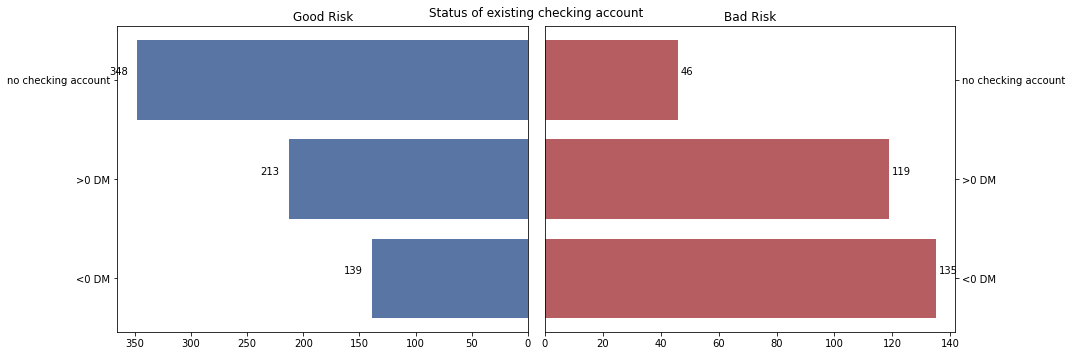

In [ ]:
visualize_distribution("Status of existing checking account")

#### Credit history
A credit history is a record of a borrower's responsible repayment of debts.

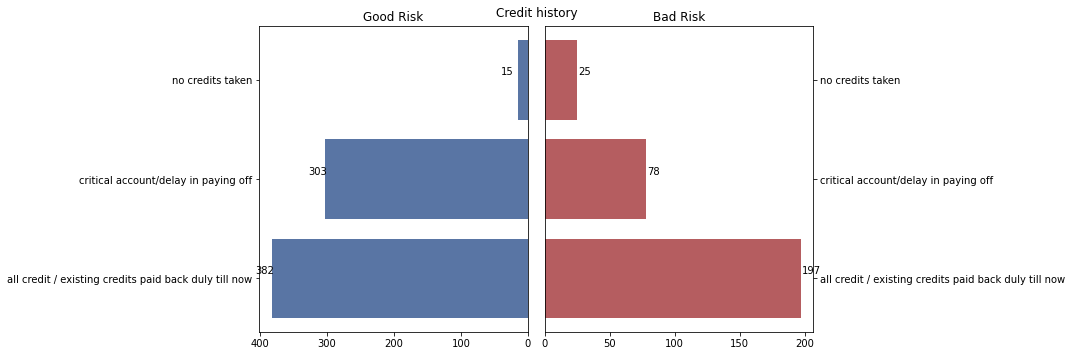

In [ ]:
visualize_distribution("Credit history")

#### Purpose
The underlying reason an applicant is seeking a loan

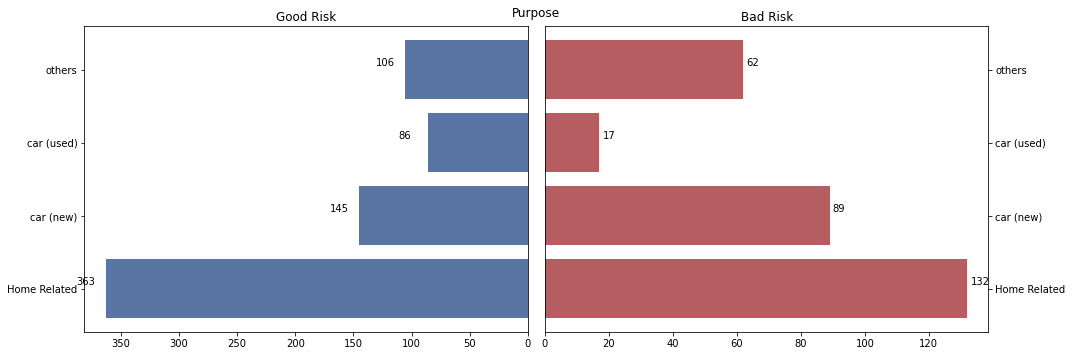

In [ ]:
visualize_distribution("Purpose")

#### Savings account/bonds
A savings account is an interest-bearing deposit account held at a bank or other financial institution that provides a modest interest rate.m

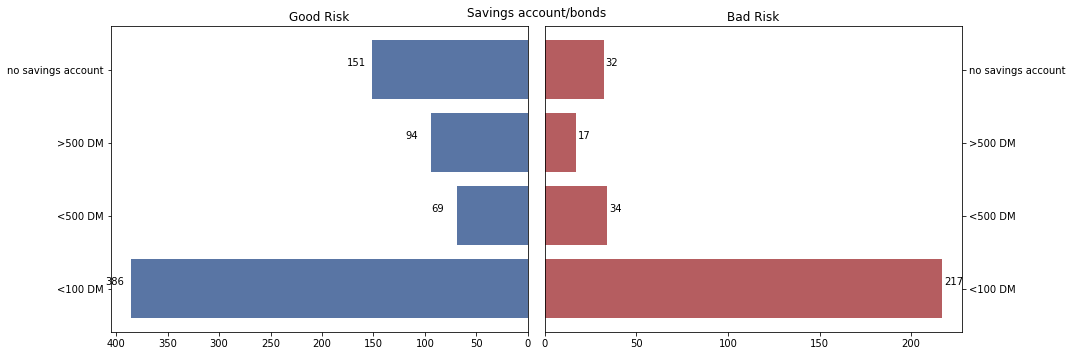

In [ ]:
visualize_distribution("Savings account/bonds")

#### Present employment since


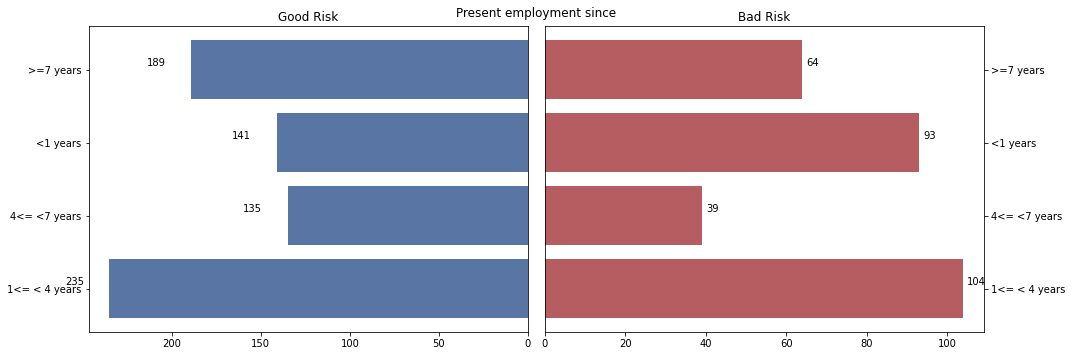

In [ ]:
visualize_distribution("Present employment since")

#### Installment rate in percentage of disposable income

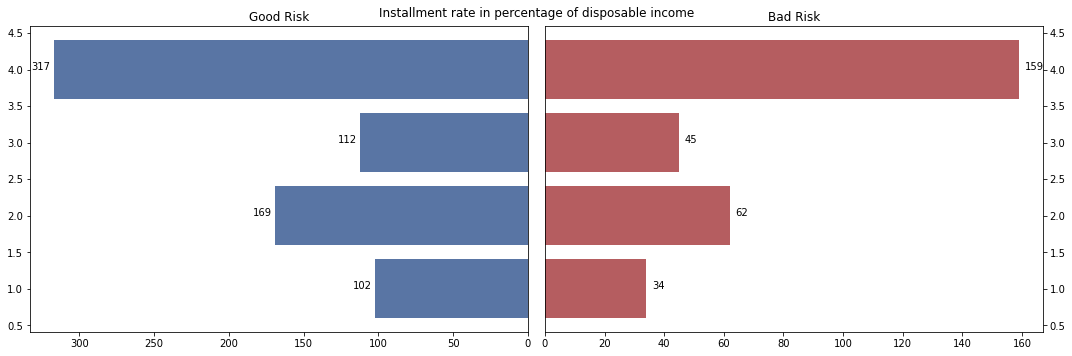

In [ ]:
visualize_distribution("Installment rate in percentage of disposable income")

#### Personal status and sex

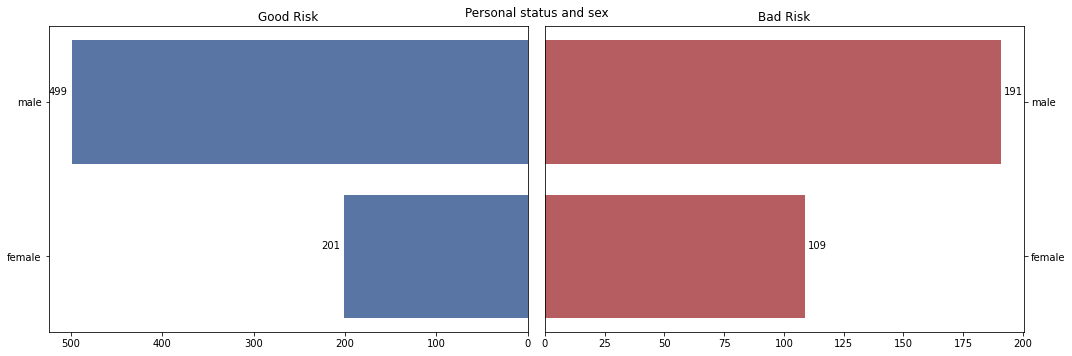

In [ ]:
visualize_distribution("Personal status and sex")

#### Other debtors / guarantors
A guarantor is a person who guarantees to pay for someone else's debt if he or she should default on a loan obligation. A guarantor acts as a co-signer of sorts, in that they pledge their own assets or services if a situation arises in which the original debtor cannot perform their obligations

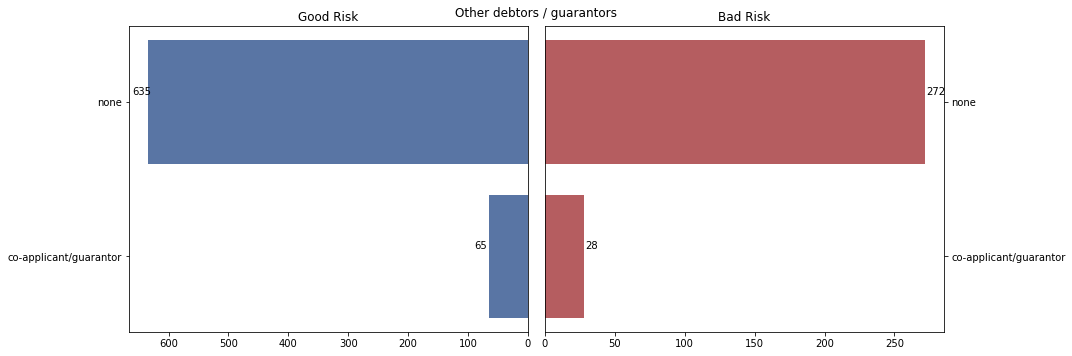

In [ ]:
visualize_distribution("Other debtors / guarantors")

#### Present residence since

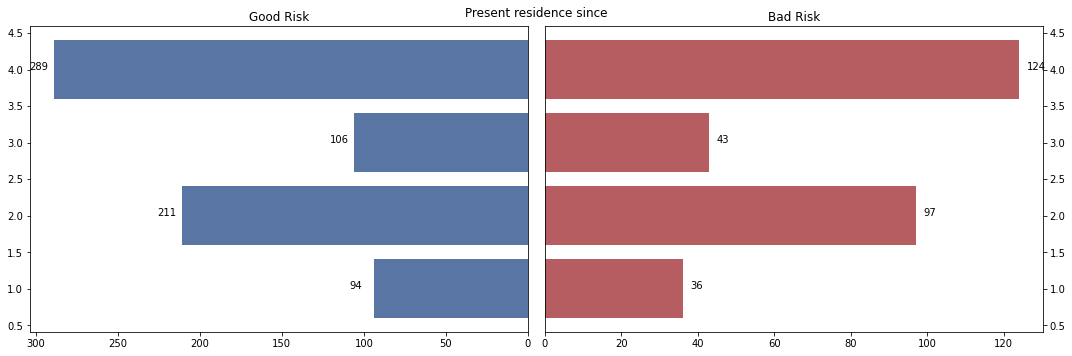

In [ ]:
visualize_distribution("Present residence since")

#### Property
Borrower's property

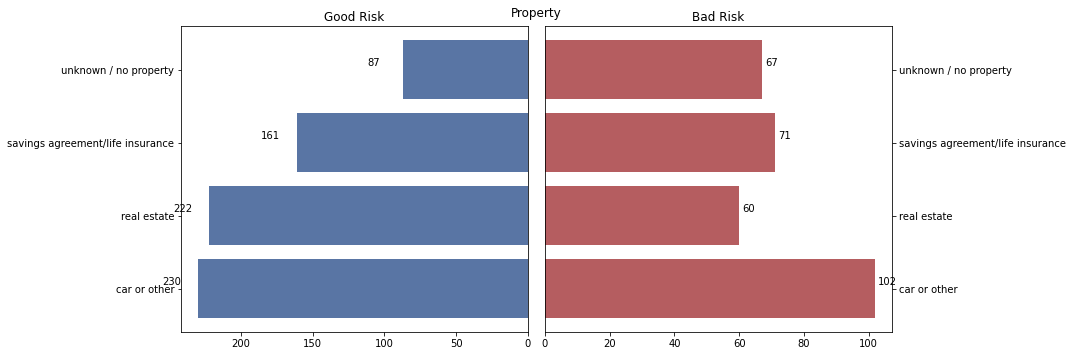

In [ ]:
visualize_distribution("Property")

#### Other installment plans
Installment plan enable people to buy goods over an extended period of time, without having to put down very much money at the time of purchase

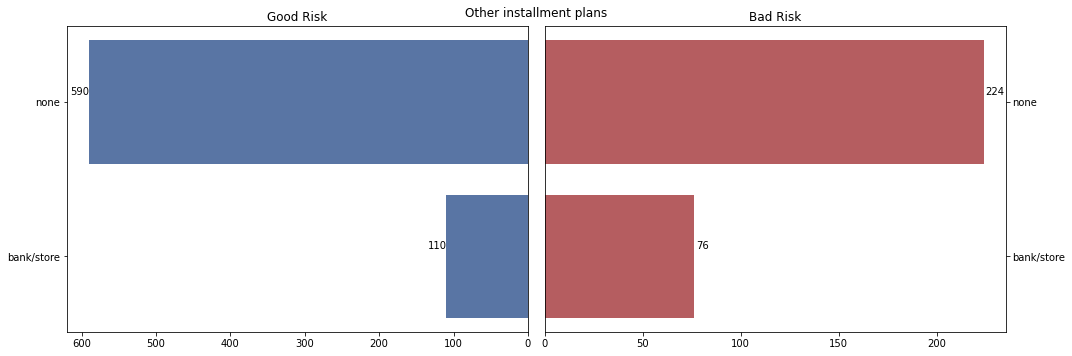

In [ ]:
visualize_distribution("Other installment plans")

#### Housing

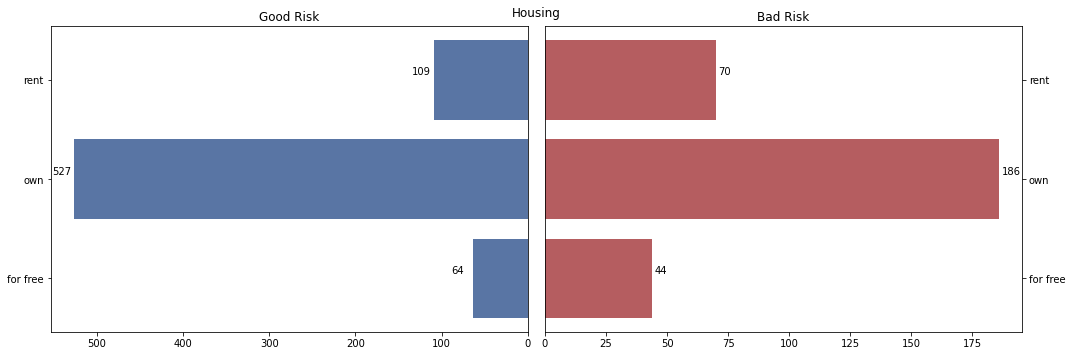

In [ ]:
visualize_distribution("Housing")

#### Number of existing credits at this bank

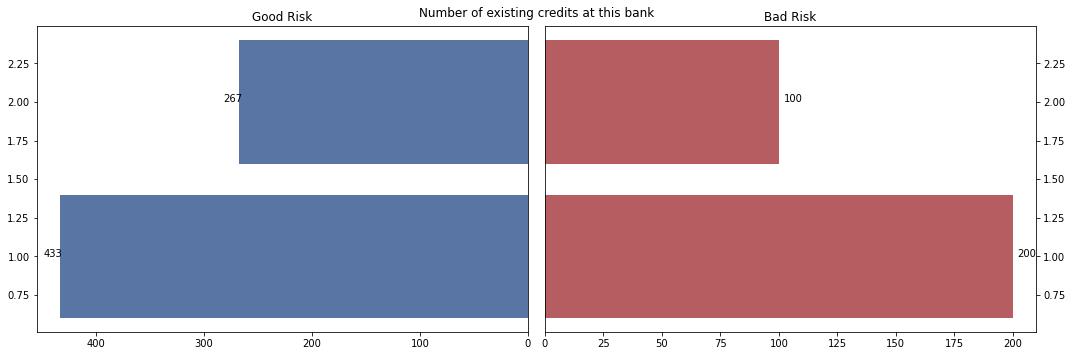

In [ ]:
visualize_distribution("Number of existing credits at this bank")

#### Number of people being liable to provide maintenance for

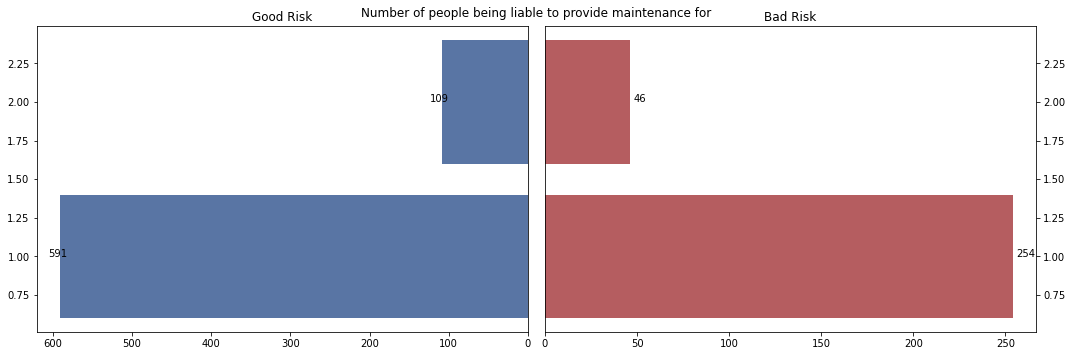

In [ ]:
visualize_distribution("Number of people being liable to provide maintenance for")

#### Foreign worker

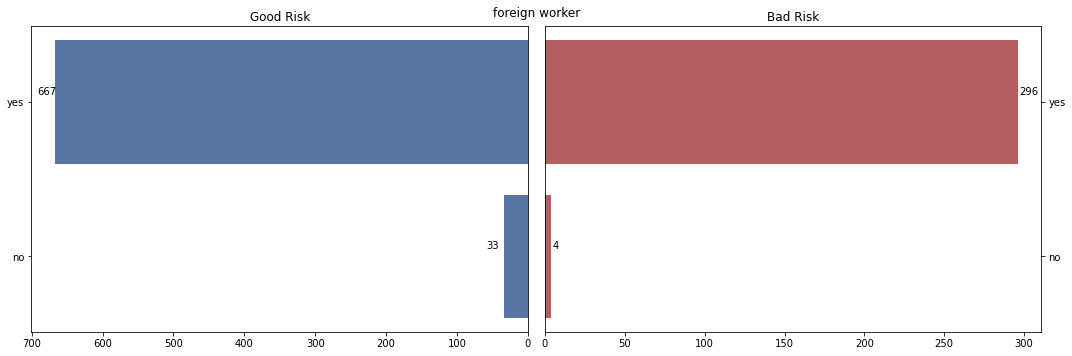

In [ ]:
visualize_distribution("foreign worker")

#### Duration in Year
Duration in month converted to years.


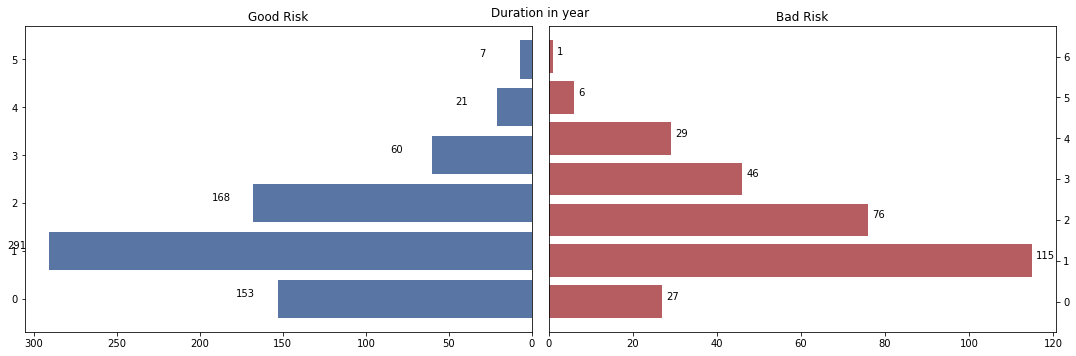

In [ ]:
df["Duration in year"]=df["Duration in month"].apply(lambda x: (floor(x/12)))
visualize_distribution("Duration in year")

#### Age category
age converted to categorica variable based on range

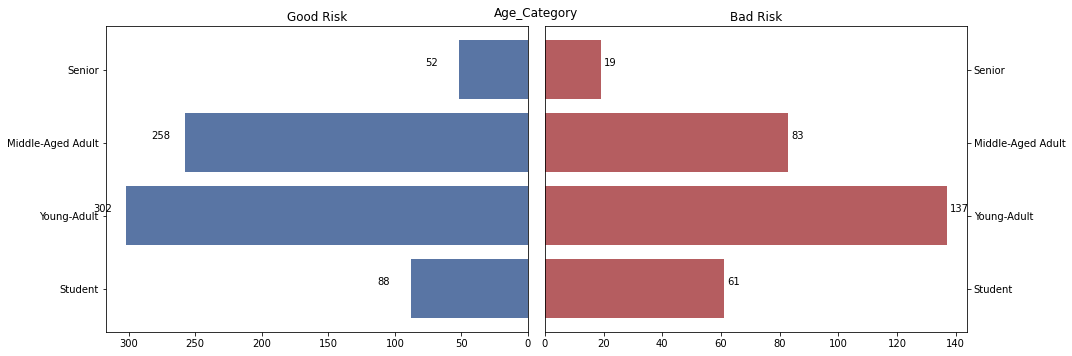

In [ ]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")


### Numerical Variable

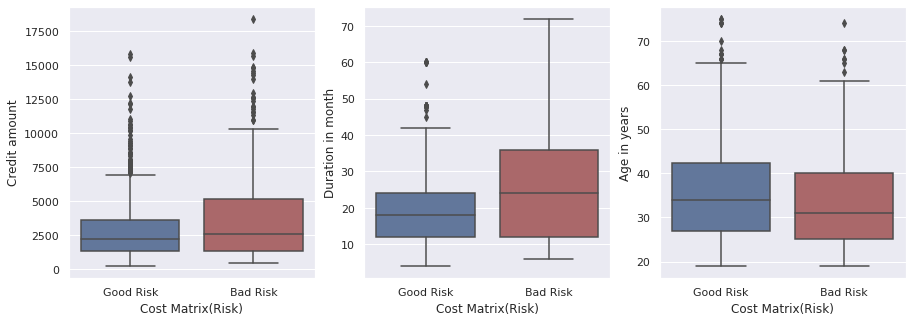

In [ ]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["Credit amount"],x=df["Cost Matrix(Risk)"],orient='v' , ax=axes[0],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Duration in month"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[1],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Age in years"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[2],palette=["#5975A4","#B55D60"]) #box plot
plt.show()

### Feature Selection

In [ ]:
column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Installment rate in percentage of disposable income","Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]

statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(df[attr],df["Cost Matrix(Risk)"]).reset_index()
    obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))


statistical_significance=[]
column_names_cont_stats=["Credit amount","Age in years","Duration in month"]
good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0.000000
1,Credit history,0.000000
2,Purpose,0.000050
3,Savings account/bonds,0.000000
4,Present employment since,0.000422
5,Installment rate in percentage of disposable income,0.140033
6,Personal status and sex,0.020740
7,Other debtors / guarantors,0.924283
8,Present residence since,0.861552
9,Property,0.000029


,Attribute,P-value
0,Credit amount,0.000001
1,Age in years,0.003925
2,Duration in month,0.000000


__Selected_Features__: Status of existing checking account, Credit history, Purpose,Savings account/bonds, Present employment since, Personal status and sex, Property, Other installment plans, Housing, foreign worker, Credit amount, Age in years, Duration in month

In [ ]:
attr_significant=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker",\
"Credit amount","Age in years","Duration in month"]
target_variable=["Cost Matrix(Risk)"]
df=df[attr_significant+target_variable]

__Creating Dummy Variable from Categorical Variables__

In [ ]:
col_cat_names=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker"]
for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr), left_index=True, right_index=True)
    df.drop(attr,axis=1,inplace=True)
 
#converting target variable into numeric
risk={"Good Risk":1, "Bad Risk":0}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [ ]:
#view of the dataset for modelling
df.head()

,Credit amount,Age in years,Duration in month,Cost Matrix(Risk),Status of existing checking account_<0 DM,Status of existing checking account_>0 DM,Status of existing checking account_no checking account,Credit history_all credit / existing credits paid back duly till now,Credit history_critical account/delay in paying off,Credit history_no credits taken,Purpose_Home Related,Purpose_car (new),Purpose_car (used),Purpose_others,Savings account/bonds_<100 DM,Savings account/bonds_<500 DM,Savings account/bonds_>500 DM,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Personal status and sex_female,Personal status and sex_male,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank/store,Other installment plans_none,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,1169,67,6,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1,5951,22,48,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,2096,49,12,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
3,7882,45,42,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
4,4870,53,24,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1


#### Principal Component Analysis : Dimensionality Reduction

In [ ]:
X = df.drop('Cost Matrix(Risk)', 1).values #independent variables
y = df["Cost Matrix(Risk)"].values #target variables

pca = PCA(n_components=16)
X = pca.fit_transform(X)

### Modelling Classifier

### Train/Test Split

In [ ]:
# Spliting dataset into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0, stratify = y)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 16), (800,), (200, 16), (200,))

## Creating a Function To Compare AUC Scores

In [ ]:
def acc_summary(pipeline, X_train, y_train, X_val, y_val):
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_val)
    train_test_time = time() - t0
    score = f1_score(y_val, y_pred)
    print("F1 score : {0:.2f}%".format(score))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return score, train_test_time


In [ ]:
names = [ 
        'Logistic Regression',
        'Perceptron',
        'Ridge Classifier',
        'SGD Classifier',
        'SVC',
        'Gradient Boosting Classifier', 
        'Extra Trees Classifier', 
        "Bagging Classifier",
        "AdaBoost Classifier", 
        "K Nearest Neighbour Classifier",
         "Decison Tree Classifier",
         "Random Forest Classifier",
         'GaussianNB',
        "Gaussian Process Classifier",
        "MLP Classifier",
        "XGB Classifier",
        "LGBM Classifier"
         ]
classifiers = [
    LogisticRegression(),
    Perceptron(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(), 
    BaggingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    GaussianProcessClassifier(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier()
        ]

zipped_clf = zip(names,classifiers)

In [ ]:
def classifier_comparator(X_train,y_train,X_val,y_val,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,X_train, y_train, X_val, y_val)
        result.append((n,clf_acc,tt_time))
    return result

Initially we will test without any cross fold validation, later while fine tuning we will overcome that drawback

In [ ]:
classifier_comparator(X_train,y_train,X_test,y_test)

Validation result for Logistic Regression
F1 score : 0.86%
train and test time: 0.04s
--------------------------------------------------------------------------------
Validation result for Perceptron
F1 score : 0.45%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
F1 score : 0.85%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for SGD Classifier
F1 score : 0.70%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for SVC
F1 score : 0.82%
train and test time: 0.08s
--------------------------------------------------------------------------------
Validation result for Gradient Boosting Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1 score : 0.83%
train and test time: 0.46s
--------------------------------------------------------------------------------
Validation result for Extra Trees Classifier
F1 score : 0.84%
train and test time: 0.20s
--------------------------------------------------------------------------------
Validation result for Bagging Classifier
F1 score : 0.79%
train and test time: 0.10s
--------------------------------------------------------------------------------
Validation result for AdaBoost Classifier
F1 score : 0.80%
train and test time: 0.17s
--------------------------------------------------------------------------------
Validation result for K Nearest Neighbour Classifier
F1 score : 0.82%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for Decison Tree Classifier
F1 score : 0.78%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for R

[('Logistic Regression', 0.8571428571428571, 0.04204368591308594),
 ('Perceptron', 0.44549763033175355, 0.003267049789428711),
 ('Ridge Classifier', 0.8534201954397395, 0.003570079803466797),
 ('SGD Classifier', 0.6962962962962963, 0.00599217414855957),
 ('SVC', 0.8217522658610271, 0.07978272438049316),
 ('Gradient Boosting Classifier', 0.8282828282828283, 0.4571390151977539),
 ('Extra Trees Classifier', 0.8431372549019608, 0.19742536544799805),
 ('Bagging Classifier', 0.7942238267148014, 0.10211896896362305),
 ('AdaBoost Classifier', 0.8013937282229965, 0.16533136367797852),
 ('K Nearest Neighbour Classifier', 0.8155339805825242, 0.018877267837524414),
 ('Decison Tree Classifier', 0.7797833935018051, 0.018689632415771484),
 ('Random Forest Classifier', 0.8581081081081081, 0.4115583896636963),
 ('GaussianNB', 0.8294314381270903, 0.0013561248779296875),
 ('Gaussian Process Classifier', 0.708029197080292, 0.4039731025695801),
 ('MLP Classifier', 0.7490039840637449, 0.22811508178710938),


### Light GBM Classifier has the highest F1-score score amongst all models

## GridSearch Hyperparameter Tuning LightGBM

In [ ]:
model = LGBMClassifier()

In [ ]:
 parameters = {
     'n_estimators': [  100, 200,500  ],
     'learning_rate':[  0.1, 0.05, 0.005 ],
     'feature_fraction': [ 0.6, 0.8,  0.9],
     'bagging_fraction': [  0.6, 0.8 ],
     'bagging_freq': [   100, 200, 400  ]
     }

In [ ]:
gsearch_lgb = GridSearchCV(model, param_grid = parameters,verbose=10)

In [ ]:
gsearch_lgb.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5; 1/162] START bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100
[CV 1/5; 1/162] END bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100;, score=0.706 total time=   0.1s
[CV 2/5; 1/162] START bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100
[CV 2/5; 1/162] END bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100;, score=0.700 total time=   0.1s
[CV 3/5; 1/162] START bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100
[CV 3/5; 1/162] END bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100;, score=0.762 total time=   0.1s
[CV 4/5; 1/162] START bagging_fraction=0.6, bagging_freq=100, feature_fraction=0.6, learning_rate=0.1, n_estimators=100
[CV 

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'bagging_fraction': [0.6, 0.8],
                         'bagging_freq': [100, 200, 400],
                         'feature_fraction': [0.6, 0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.005],
                         'n_estimators': [100, 200, 500]},
             verbose=10)

In [ ]:
print('best params')
print (gsearch_lgb.best_params_)

best params
{'bagging_fraction': 0.6, 'bagging_freq': 400, 'feature_fraction': 0.8, 'learning_rate': 0.005, 'n_estimators': 500}


In [ ]:
y_pred = gsearch_lgb.predict(X_test)
print("5 fold Cross Validation F1 Score: ", f1_score(y_test,y_pred))

5 fold Cross Validation F1 Score:  0.839344262295082


## ROC Curve and AUC Score

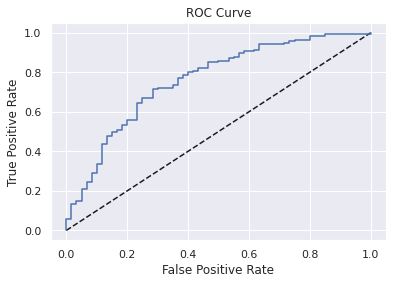

In [ ]:
y_pred_prob = gsearch_lgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()